<a href="https://colab.research.google.com/github/amitganon/Data-engineering/blob/main/%D7%94%D7%A0%D7%93%D7%A1%D7%AA_%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D_%D7%A2%D7%91%D7%95%D7%93%D7%94_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **start-up**

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

!mkdir /root/.kaggle/ 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token ={"username":"amitganon","key":"3d37cfbaf99868ba7700ca65f0bfa80d"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/ccdata

# download the dataset from Kaggle and unzip it 
!kaggle datasets download -d arjunbhasin2013/ccdata

!unzip /content/ccdata.zip
!ls /content/datasets/ccdata

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/ccdata’: File exists
ccdata.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/ccdata.zip
replace CC GENERAL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CC GENERAL.csv          


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
df= pd.read_csv('/content/CC GENERAL.csv')
df=df.dropna()

## Q1

In [ ]:
from sklearn.cluster import KMeans
features_list = ["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE"]
def split(df, k, features_list):
  df_Gen = df.copy()
  k_est = KMeans(n_clusters=k)
  k_est.fit(df_Gen[features_list])
  df_Gen[ '%s-NN General' %k ] = k_est.labels_
  return df_Gen

df_General = split(df, 3, features_list)
df_General


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,3-NN General
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


## Q2

In [ ]:
def norm_col(df, col_name):
  df1 = df.copy()
  l = df1[col_name].values
  max_val,min_val = max(l), min(l)
  df1[col_name] = df1[col_name].apply(lambda v: (v-min_val)/(max_val-min_val))
  return df1

def split_norm(df, k, features_list):
  df_norm = df.copy()
  for c in features_list:
    df_norm = norm_col(df_Norm, c)
  k_est = KMeans(n_clusters=k)
  k_est.fit(df_norm[features_list])
  df_norm[ '%s-NN Normal' %k ] = k_est.labels_
  return df_norm

df_Norm = split_norm(df, 3, features_list)
df_Norm

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,3-NN Normal
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,1.0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1.0,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,1.0,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,1.0,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,0.0,0
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0.0,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0.0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0.0,0


## Q3

In [ ]:
import math

def norm_col(df, col_name):
  df1 = df.copy()
  l = df1[col_name].values
  max_val,min_val = max(l), min(l)
  df1[col_name] = df1[col_name].apply(lambda v: (v-min_val)/(max_val-min_val))
  return df1

def euc_len(df, k, features_list):
  df_test = df.copy()
  for c in features_list:
    df_test = norm_col(df_test, c)
  k_est = KMeans(n_clusters=k)
  k_est.fit(df_test[features_list])
  df_test['label'] = k_est.labels_
  centers = k_est.cluster_centers_
  euc_dist = []
  for row in range(len(df_test)):
    curr = 0
    label = df_test.iloc[row]['label']
    for i in range(len(features_list)):
      curr += (df_test.iloc[row][features_list[i]] - centers[label][i])**2
    euc_dist += [math.sqrt(curr)]
  return sum(euc_dist), sum(euc_dist)/len(euc_dist)

euc_sum , euc_average = euc_len(df, 3, features_list)
print(euc_sum)
print(euc_average)


3901.3578918070093
0.45175519821757865


## Q4

In [ ]:
def norm_col(df, col_name):
  df1 = df.copy()
  l = df1[col_name].values
  max_val,min_val = max(l), min(l)
  df1[col_name] = df1[col_name].apply(lambda v: (v-min_val)/(max_val-min_val))
  return df1

def man_len(df, k, features_list):
  df_test = df.copy()
  for c in features_list:
    df_test = norm_col(df_test, c)
  k_est = KMeans(n_clusters=k)
  k_est.fit(df_test[features_list])
  df_test['label'] = k_est.labels_
  centers = k_est.cluster_centers_
  man_dist = []
  for row in range(len(df_test)):
    curr = 0
    label = df_test.iloc[row]['label']
    for i in range(len(features_list)):
      curr += abs(df_test.iloc[row][features_list[i]] - centers[label][i])
    man_dist += [curr]
  return sum(man_dist), sum(man_dist)/len(man_dist)

man_sum , man_average = man_len(df, 3, features_list)


In [ ]:
print(man_sum)
print(man_average)


9082.853269500878
1.0517430835457247


## Q5

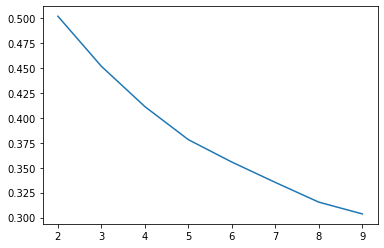

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x_list = []
y_list = []
for k in range(2, 10):
  x_list.append(k)
  euc_sum , euc_average = euc_len(df, k, features_list)
  y_list.append(euc_average)

plt.plot(x_list, y_list)
plt.show()


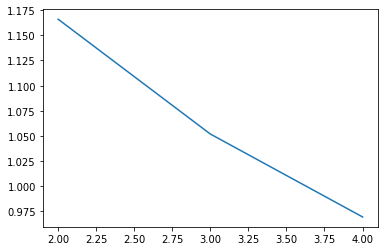

In [ ]:
x_list = []
y_list = []
for k in range(2, 5):
  x_list.append(k)
  man_sum , man_average = man_len(df, k, features_list)
  y_list.append(man_average)

plt.plot(x_list, y_list)
plt.show()
